<h1>Newton's method</h1>

<p>Begin by loading our package that brings in plotting and other features, including those provided by the <code>Roots</code> package:</p>

<p>To get started, we load the <code>MTH229</code> package:</p>

In [1]:
using MTH229
using Plots

<hr />

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/newton.html">Newton's Method</a>.</p>

<p>For the impatient, symbolic math - as is done behind the scenes at the Wolfram alpha web site - is pretty nice. For so many problems it can easily do what is tedious work. However, for some questions, only numeric solutions are possible. For example, there is no general formula to solve a fifth order polynomial the way there is a quadratic formula for solving quadratic polynomials. Even an innocuous polynomial like $f(x) = x^5 - x - 1$ has no easy algebraic solution.</p>

<p>A graph shows what looks like just one answer between $1$ and $2$, closer to $1$</p>

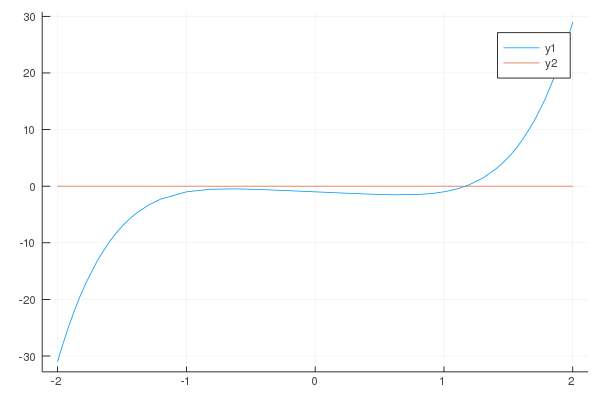

In [1]:
f(x) = x^5 - x - 1
plot(f, -2, 2)
plot!(zero, -2, 2)

<p>From this, we can call the bisection method to identify the value:</p>

In [1]:
fzero(f, -2, 2)

1.1673039782614187

<p>We've seen the bisection method previously to find a root, but this is somewhat cumbersome to use as it needs a <a href="https://en.wikipedia.org/wiki/Bisection_method#The_method">bracketing</a> interval to begin. Moreover, bisection can be computationally slow (by comparison).</p>

<p>Here we discuss Newton's method. Like the bisection method it is an <em>iterative algorithm</em>. However instead of identifying a bracketing interval, we only need to identify a reasonable <em>initial</em> guess, $x_0$.</p>

<p>Starting with $x_0$ the algorithm to produce $x_1$ is easy to describe:</p>

<ul>
<li><p>form the tangent line at $(x_0, f(x_0))$.</p>
</li>
<li><p>let $x_1$ be the intersection point of this tangent line with the $x$ axis.</p>
</li>
</ul>

<p>If we can go from $x_0$ to $x_1$ we can repeat the update step to get $x_2$ and then $x_3$, ...</p>

<p>Graphically, this figure illustrates the process:</p>

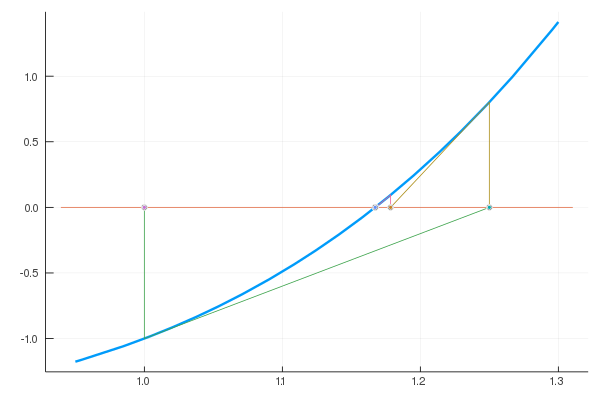

In [1]:
f(x) = x^5 - x - 1
newton_vis(f, 1, 0.95, 1.3)

<p>In the figure, the sequence of guesses can be seen, basically $1$, $1.25$, $1.178\dots$, $1.167\dots$, ...</p>

<p>To find these numerically, we first need an algebraic representation. For this problem, we can describe the tangent line's slope by <em>either</em> $f'(x_0)$ <em>or</em> by using "rise over run":</p>


$$
f'(x_0) = \frac{f(x_0)-f(x_1)}{x_0 - x_1}
$$


<p>Using $f(x_1)=0$, this yields the update formula: $x_1 = x_0 - f(x_0) / f'(x_0)$. That is, the new guess shifts the old guess by an increment $f(x_0)/f'(x_0)$.</p>

<p>In <code>Julia</code>, we can do one step with:</p>

In [1]:
f(x) = x^5 - x - 1
x = 1
x = x - f(x) / f'(x)

1.25

<p>(We don't use indexing, but rather update our binding for the <code>x</code> variable.)</p>

<p>Is <code>x</code> close to being the zero? We don't know the actual zero - we are trying to approximate it - but we do know the function's value at the actual zero. For this new guess the function value is</p>

In [1]:
f(x)

0.8017578125

<p>This is much closer to $0$ than $f(1)$, the value at our initial guess, but not nearly as close as we can get using Newton's method. We just need to <strong>iterate</strong> - run a few more steps.</p>

<p>We do another step just by running the last line. For example, we run 5 more steps by copying and pasting the same expression:</p>

In [1]:
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)
x = x - f(x) / f'(x)

1.1673039782614187

<p>The value of <code>x</code> updates. But is it getting closer to a <em>zero</em>? If so, then $f(x)$ should be close to zero. We can see both values with:</p>

In [1]:
x, f(x)

(1.1673039782614187, 6.661338147750939e-16)

<p>This shows $f(x)$ is not exactly $0.0$ but it is as close as we can get. Repeating the algorithm does not change the value of <code>x</code>. (On a computer, floating point issues creep in when values are close to 0, and these prevent values being mathematically exact.) As we can't improve, we stop. Our value of <code>x</code> is an <em>approximate</em> zero and <code>f&#40;x&#41;</code> is within machine tolerance of being <code>0</code>.</p>

<p>How do we know how to stop? When the algorithm works, we will stop when the <code>x</code> value <em>basically</em> stops updating, as <code>f&#40;x&#41;</code> is basically <code>0</code>. However, the algorithm need not work, so any implementation must keep track of how many steps are taken and stop when this gets out of hand.</p>

<p>For convenience, the <code>newton</code> function in  the <code>MTH229</code> package (using the <code>Roots</code> package) will iterate until convergence. If we pass in the optional argument <code>verbose&#61;true</code> we will see the sequence of steps.</p>

<p>For example, for $f(x) = x^3 - 2x - 5$, a function that Newton himself considered, a solution near $2$, is found with:</p>

In [1]:
x = 2
f(x) = x^3 - 2x -5
xstar = newton(f, 2)

2.0945514815423265

<p>We can see the approximate zero and the function value, as follows:</p>

In [1]:
xstar, f(xstar)

(2.0945514815423265, -8.881784197001252e-16)

<hr />

<h3>Using fzero from the Roots package</h3>

<p>As mentioned, the <code>newton</code> function in the <code>Roots</code> package implements Newton's method.  The <code>Roots</code> package also provides the <code>fzero</code> function for finding roots. (also known as <code>find_zero</code>.)  We have seen it used with a bracketing interval, but it also provides a solution when just given an initial guess - like Newton's method:</p>

In [1]:
fzero(sin, 3)   # start with initial guess of 3, returns 3.141592653589793

3.141592653589793

<p>The utility of this function is that it does not require a derivative to be taken and it is a little less sensitive than Newton's method to the initial guess. The use of <code>fzero</code> is recommended.</p>

<h3>When Newton's method fails</h3>

<p>The error in the $n$th step using Newton's method at a simple zero follows a formula: $|e_{n+1}| \leq (1/2) |f''(a)/f'(b)| \cdot |e_n|^2$, for some $a$ and $b$. Generally this ensures that the error at step $n+1$ is smaller than the error at step $n$ squared. But this can fail due to various cases:</p>

<ul>
<li><p>the initial guess is not close to the zero</p>
</li>
<li><p>the derivative, $|f'(x)|$, is too small</p>
</li>
<li><p>the second derivative, $|f''(x)|$, is too big, or possibly undefined.</p>
</li>
</ul>

<h3>Quadratic convergence</h3>

<p>When Newton's method converges to a <em>simple zero</em> it is said to have <em>quadratic convergence</em>. A simple zero is one with multiplicity 1 and quadratic convergence says basically that the error at the $i+1$st step is like the error for $i$th step squared. In particular, if the error is like $10^{-3}$ on one step, it will be like $10^{-6}$, then $10^{-12}$ then $10^{-24}$ on subsequent steps. (Which is typically beyond the limit of a floating point approximation.) This is why one can <em>usually</em> take just 5, or so, steps to get to an answer.</p>

<p>Not so for multiple roots and some simple roots.</p>

<hr />